<a href="https://colab.research.google.com/github/DoctorVinay8097/DLprojects/blob/main/DL_Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN based image segmentation using U-Net**

**Image segmentation** is a fundamental task in computer vision that involves dividing an image into multiple, meaningful segments or regions based on certain criteria. These segments typically correspond to objects or regions of interest within the image.

**Image segmentation using U-Net** is a popular technique in computer vision and medical image analysis. U-Net is a convolutional neural network (CNN) architecture designed for semantic segmentation tasks, which involve classifying each pixel in an image into one of several predefined classes or segments.

Here's a step-by-step guide on how to perform image segmentation using a U-Net architecture:

**Data Preparation:**

Gather your dataset, which should include both input images and corresponding pixel-wise labeled masks (segmentation maps).

**Architecture:**

The U-Net architecture consists of an encoder and a decoder. The encoder extracts features from the input image, and the decoder generates a segmentation map.

**Loss Function:**

Choose an appropriate loss function for your segmentation task. Common choices include binary cross-entropy for binary segmentation and categorical cross-entropy for multi-class segmentation.

**Training:**

Split your dataset into training, validation, and test sets.
Train the U-Net model on your training data. Use an appropriate optimizer, such as Adam, and monitor validation loss.
Training can take a while, so consider using GPU acceleration if available.


Epoch 1/10
3/3 [==============================] - 28s 9s/step - loss: 0.6944 - val_loss: 0.6943
Epoch 2/10
3/3 [==============================] - 16s 5s/step - loss: 0.6942 - val_loss: 0.6932
Epoch 3/10
3/3 [==============================] - 15s 5s/step - loss: 0.6933 - val_loss: 0.6935
Epoch 4/10
3/3 [==============================] - 15s 4s/step - loss: 0.6934 - val_loss: 0.6932
Epoch 5/10
3/3 [==============================] - 15s 4s/step - loss: 0.6932 - val_loss: 0.6932
Epoch 6/10
3/3 [==============================] - 15s 5s/step - loss: 0.6932 - val_loss: 0.6932
Epoch 7/10
3/3 [==============================] - 16s 5s/step - loss: 0.6932 - val_loss: 0.6932
Epoch 8/10
3/3 [==============================] - 15s 5s/step - loss: 0.6932 - val_loss: 0.6932
Epoch 9/10
3/3 [==============================] - 15s 5s/step - loss: 0.6932 - val_loss: 0.6932
Epoch 10/10
1/1 [==============================] - 1s 923ms/step - loss: 0.6932
Validation Loss: 0.6932
1/1 [===========================

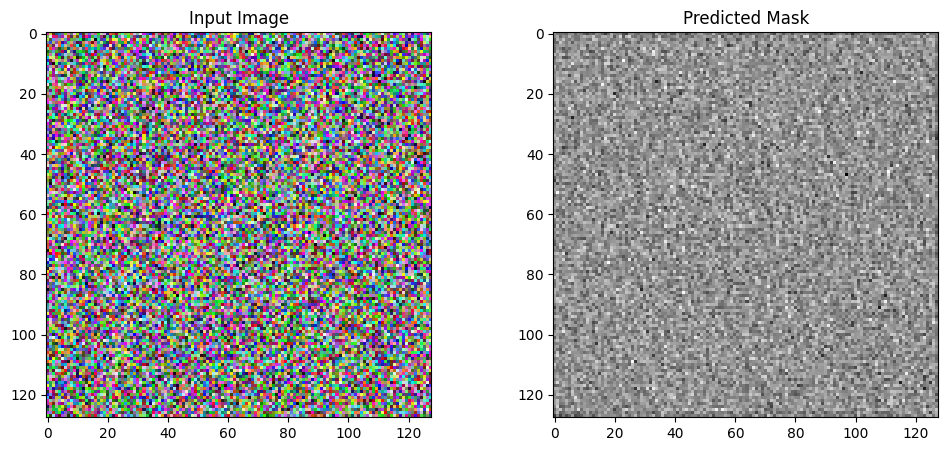

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Generate synthetic data (for demonstration purposes)
def generate_synthetic_data(num_samples=100, image_size=128):
    images = np.random.rand(num_samples, image_size, image_size, 3)
    masks = np.random.randint(0, 2, size=(num_samples, image_size, image_size))
    return images, masks

# Create a U-Net model
def unet_model(input_size=(128, 128, 3)):
    inputs = keras.Input(input_size)

    # Encoder
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    # Decoder
    up2 = layers.UpSampling2D(size=(2, 2))(pool1)
    up2 = layers.Conv2D(64, 2, activation='relu', padding='same')(up2)
    up2 = layers.concatenate([conv1, up2], axis=3)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(up2)

    model = keras.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model

# Generate synthetic data
images, masks = generate_synthetic_data()

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, masks, test_size=0.2, random_state=42)

# Create and compile the U-Net model
model = unet_model()

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model
loss = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss:.4f}')

# Visualize some results
sample_image = X_val[0]
predicted_mask = model.predict(np.expand_dims(sample_image, axis=0))[0]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title('Input Image')

plt.subplot(1, 2, 2)
plt.imshow(predicted_mask[:, :, 0], cmap='gray')
plt.title('Predicted Mask')

plt.show()